<a href="https://colab.research.google.com/github/ffelicioni/tp_infoviz/blob/main/EDA_CheckinJournal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Datases - CheckinJournal


In [16]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import datetime
import numpy as np

In [2]:
def seasonal_plot(X, y, period, freq, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    palette = sns.color_palette("deep", n_colors=X[period].nunique(),)
    ax = sns.lineplot(
        x=freq,
        y=y,
        hue=period,
        data=X,
        ci=False,
        ax=ax,
        palette=palette,
        legend=False,
    )
    ax.set_title(f"Seasonal Plot ({period}/{freq})")
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(
            name,
            xy=(1, y_),
            xytext=(6, 0),
            color=line.get_color(),
            xycoords=ax.get_yaxis_transform(),
            textcoords="offset points",
            size=14,
            #va="center",
        )
    return ax

In [12]:
!wget https://raw.githubusercontent.com/ffelicioni/tp_infoviz/main/data/Journals/CheckinJournal.zip
!unzip /content/CheckinJournal.zip

--2022-06-01 19:13:04--  https://raw.githubusercontent.com/ffelicioni/tp_infoviz/main/data/Journals/CheckinJournal.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10368289 (9.9M) [application/zip]
Saving to: ‘CheckinJournal.zip’

CheckinJournal.zip  100%[===================>]   9.89M  --.-KB/s    in 0.1s    

2022-06-01 19:13:04 (88.7 MB/s) - ‘CheckinJournal.zip’ saved [10368289/10368289]

Archive:  /content/CheckinJournal.zip
  inflating: CheckinJournal.csv      


In [17]:
checkin_journal=pd.read_csv("./CheckinJournal.csv", parse_dates=['timestamp'])
checkin_journal

,participantId,timestamp,venueId,venueType
0,619,2022-03-01 05:35:00+00:00,1798,Pub
1,15,2022-03-01 05:50:00+00:00,1798,Pub
2,23,2022-03-01 05:55:00+00:00,894,Pub
3,699,2022-03-01 06:00:00+00:00,1798,Pub
4,876,2022-03-01 06:00:00+00:00,1804,Restaurant
...,...,...,...,...
2100630,320,2023-05-25 00:05:00+00:00,826,Apartment
2100631,360,2023-05-25 00:05:00+00:00,768,Apartment
2100632,487,2023-05-25 00:05:00+00:00,687,Apartment
2100633,691,2023-05-25 00:05:00+00:00,1275,Apartment


In [18]:
checkin_journal.dtypes

participantId                  int64
timestamp        datetime64[ns, UTC]
venueId                        int64
venueType                     object
dtype: object

In [19]:
checkin_journal.venueType.value_counts()

Apartment     790089
Workplace     507566
Restaurant    447602
Pub           355378
Name: venueType, dtype: int64

In [6]:
#DST starts on Sunday 13 March 2022, 02:00 Ohio standard time
#DST ends on Sunday 06 November 2022, 02:00 Ohio daylight time
# no es necesario convertir el horario
#checkin_journal.timestamp= checkin_journal.apply(lambda row: row['timestamp'].tz_convert('US/Eastern'), axis=1)

Otras features temporales

In [20]:
checkin_journal['week']=checkin_journal.timestamp.dt.isocalendar().week
checkin_journal['day_of_week']=checkin_journal.timestamp.dt.dayofweek
checkin_journal['days_in_month']=checkin_journal.timestamp.dt.days_in_month
checkin_journal['month']=checkin_journal.timestamp.dt.month
checkin_journal['year']=checkin_journal.timestamp.dt.year
checkin_journal['hour']=checkin_journal.timestamp.dt.hour
checkin_journal['time']=checkin_journal.timestamp.dt.time
checkin_journal['date']=checkin_journal.timestamp.dt.date

### Pubs

In [21]:
fecha_ini='2022-03-01 00:00:00+00:00'
df=checkin_journal[(checkin_journal.venueType=='Pub')]#&(checkin_journal.venueId==1344)]
df=df[df.timestamp>=fecha_ini]
df

,participantId,timestamp,venueId,venueType,week,day_of_week,days_in_month,month,year,hour,time,date
0,619,2022-03-01 05:35:00+00:00,1798,Pub,9,1,31,3,2022,5,05:35:00,2022-03-01
1,15,2022-03-01 05:50:00+00:00,1798,Pub,9,1,31,3,2022,5,05:50:00,2022-03-01
2,23,2022-03-01 05:55:00+00:00,894,Pub,9,1,31,3,2022,5,05:55:00,2022-03-01
3,699,2022-03-01 06:00:00+00:00,1798,Pub,9,1,31,3,2022,6,06:00:00,2022-03-01
7,359,2022-03-01 06:10:00+00:00,893,Pub,9,1,31,3,2022,6,06:10:00,2022-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...
2100619,125,2023-05-24 23:55:00+00:00,894,Pub,21,2,31,5,2023,23,23:55:00,2023-05-24
2100623,576,2023-05-24 23:55:00+00:00,444,Pub,21,2,31,5,2023,23,23:55:00,2023-05-24
2100625,931,2023-05-24 23:55:00+00:00,1799,Pub,21,2,31,5,2023,23,23:55:00,2023-05-24
2100628,299,2023-05-25 00:00:00+00:00,894,Pub,21,3,31,5,2023,0,00:00:00,2023-05-25


Cantidad de visitas a los pubs, ordenados

In [22]:
df.venueId.value_counts()

1344    54174
1342    50400
1800    31628
1798    31212
1343    31162
1799    28589
893     25255
892     23603
442     21703
894     20253
443     19807
444     17592
Name: venueId, dtype: int64

In [41]:
asistencia_pubs=df[['date','hour','participantId']].groupby(['date','hour']).count()
asistencia_pubs.rename(columns = {'participantId':'total'}, inplace = True)
asistencia_pubs.reset_index(inplace=True)
asistencia_pubs.date=pd.to_datetime(asistencia_pubs['date'])
asistencia_pubs['day_of_week']=asistencia_pubs['date'].dt.dayofweek
asistencia_pubs['time_h']=pd.to_timedelta(asistencia_pubs.hour, unit="hour")+asistencia_pubs.date
#asistencia_pubs

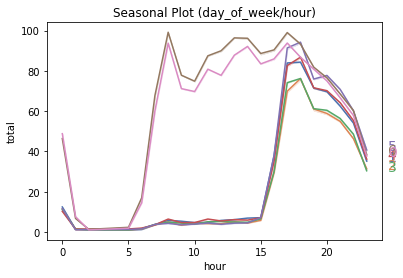

In [24]:
seasonal_plot(asistencia_pubs, y='total', period='day_of_week', freq='hour');

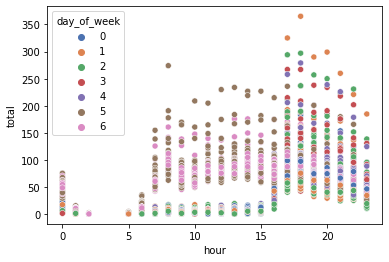

In [25]:
sns.scatterplot(data=asistencia_pubs, x="hour", y='total', hue="day_of_week",palette="deep")

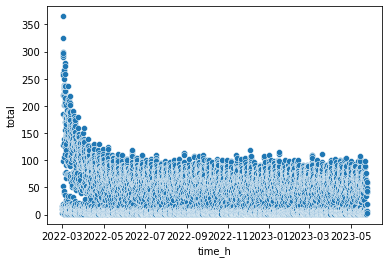

In [26]:
sns.scatterplot(data=asistencia_pubs, x="time_h", y='total',palette="deep")

### Restaurant

In [42]:
df2=checkin_journal[checkin_journal.venueType=='Restaurant']

Visitas a restaurants

In [43]:
#restaurants
df2.venueId.value_counts()

1801    48264
449     41693
1805    39195
447     34295
448     33109
897     31276
895     30355
899     28898
1345    26330
896     20784
446     17890
1802    16049
1804    15685
898     12801
1803    12124
1348     9625
1347     9468
445      8358
1346     6326
1349     5077
Name: venueId, dtype: int64

In [29]:
asistencia_resto=df2[['date','hour','participantId']].groupby(['date','hour']).count()
asistencia_resto.rename(columns = {'participantId':'total'}, inplace = True)
asistencia_resto.reset_index(inplace=True)
asistencia_resto.date=pd.to_datetime(asistencia_resto['date'])
asistencia_resto['day_of_week']=asistencia_resto['date'].dt.dayofweek
asistencia_resto

,date,hour,total,day_of_week
0,2022-03-01,6,26,1
1,2022-03-01,7,108,1
2,2022-03-01,8,138,1
3,2022-03-01,9,79,1
4,2022-03-01,10,57,1
...,...,...,...,...
8922,2023-05-24,19,41,2
8923,2023-05-24,20,28,2
8924,2023-05-24,21,22,2
8925,2023-05-24,22,16,2


In [31]:
#seasonal_plot(asistencia_resto, y='total', period='day_of_week', freq='hour');

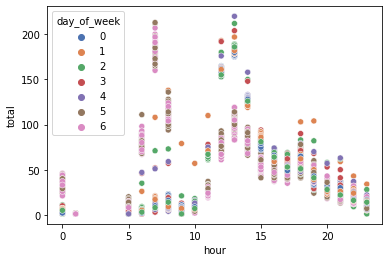

In [32]:
sns.scatterplot(data=asistencia_resto, x="hour", y='total', hue="day_of_week",palette="deep")

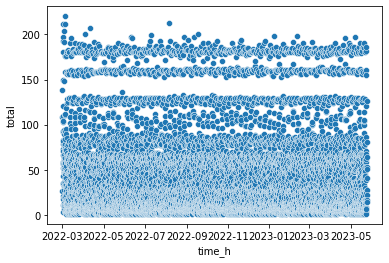

In [34]:
asistencia_resto['time_h']=pd.to_timedelta(asistencia_resto.hour, unit="hour")+asistencia_resto.date
sns.scatterplot(data=asistencia_resto, x="time_h", y='total',palette="deep")

### Workplaces

In [35]:
fecha_ini='2022-03-01 00:00:00+00:00'
df3=checkin_journal[(checkin_journal.venueType=='Workplace')]#&(checkin_journal.venueId==1344)]
#df3=df3[df3.timestamp>=fecha_ini]

asistencia_workplace=df3[['date','hour','participantId']].groupby(['date','hour']).count()
asistencia_workplace.rename(columns = {'participantId':'total'}, inplace = True)
asistencia_workplace.reset_index(inplace=True)
asistencia_workplace.date=pd.to_datetime(asistencia_workplace['date'])
asistencia_workplace['day_of_week']=asistencia_workplace['date'].dt.dayofweek
asistencia_workplace['time_h']=pd.to_timedelta(asistencia_workplace.hour, unit="hour")+asistencia_workplace.date
asistencia_workplace

,date,hour,total,day_of_week,time_h
0,2022-03-01,7,447,1,2022-03-01 07:00:00
1,2022-03-01,8,595,1,2022-03-01 08:00:00
2,2022-03-01,9,121,1,2022-03-01 09:00:00
3,2022-03-01,10,54,1,2022-03-01 10:00:00
4,2022-03-01,11,80,1,2022-03-01 11:00:00
...,...,...,...,...,...
5016,2023-05-24,13,188,2,2023-05-24 13:00:00
5017,2023-05-24,14,143,2,2023-05-24 14:00:00
5018,2023-05-24,15,99,2,2023-05-24 15:00:00
5019,2023-05-24,16,60,2,2023-05-24 16:00:00


In [36]:
asistencia_workplace.total.sum()/541 #541 dias

938.1996303142329

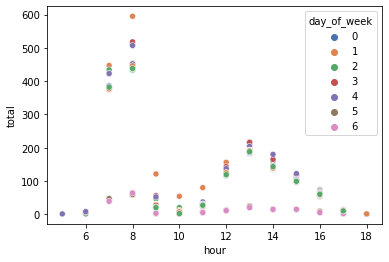

In [37]:
sns.scatterplot(data=asistencia_workplace, x="hour", y='total', hue="day_of_week",palette="deep")

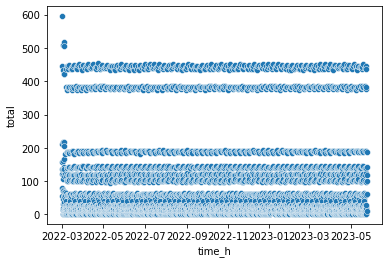

In [38]:
sns.scatterplot(data=asistencia_workplace, x="time_h", y='total',palette="deep")

### Apparments

In [39]:
fecha_ini='2022-03-01 00:00:00+00:00'
df3=checkin_journal[(checkin_journal.venueType=='Apartment')]#&(checkin_journal.venueId==1344)]
#df3=df3[df3.timestamp>=fecha_ini]

asistencia_appart=df3[['date','hour','participantId']].groupby(['date','hour']).count()
asistencia_appart.rename(columns = {'participantId':'total'}, inplace = True)
asistencia_appart.reset_index(inplace=True)
asistencia_appart.date=pd.to_datetime(asistencia_appart['date'])
asistencia_appart['day_of_week']=asistencia_appart['date'].dt.dayofweek
asistencia_appart['time_h']=pd.to_timedelta(asistencia_appart.hour, unit="hour")+asistencia_appart.date
asistencia_appart

,date,hour,total,day_of_week,time_h
0,2022-03-01,6,1,1,2022-03-01 06:00:00
1,2022-03-01,7,14,1,2022-03-01 07:00:00
2,2022-03-01,8,13,1,2022-03-01 08:00:00
3,2022-03-01,9,18,1,2022-03-01 09:00:00
4,2022-03-01,10,14,1,2022-03-01 10:00:00
...,...,...,...,...,...
9662,2023-05-24,20,78,2,2023-05-24 20:00:00
9663,2023-05-24,21,66,2,2023-05-24 21:00:00
9664,2023-05-24,22,55,2,2023-05-24 22:00:00
9665,2023-05-24,23,76,2,2023-05-24 23:00:00


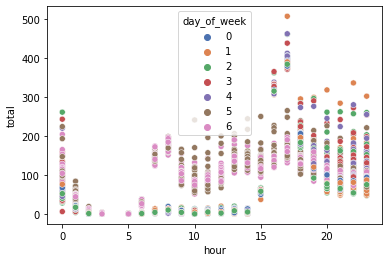

In [40]:
sns.scatterplot(data=asistencia_appart, x="hour", y='total', hue="day_of_week",palette="deep")